In [1]:
import pandas as pd

In [2]:
cars = pd.read_csv('car data.csv')

In [3]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
#getting some information about our dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#counting the number of null entries in each column
cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# encoding "Fuel_Type" Column
cars.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
cars.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
cars.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [7]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [8]:
#dividing into Indicators and Target data 
X = cars.drop(['Car_Name','Selling_Price'],axis=1)
Y = cars['Selling_Price']

In [9]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [10]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [11]:
#IMPLEMENTING LINEAR REGRESSION MODEL

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [13]:
lrm = LinearRegression()

In [14]:
#fitting the training set in our model

lrm.fit(X_train, Y_train)

LinearRegression()

In [15]:
predicted_data = lrm.predict(X_test)
print(predicted_data)

[ 7.19677122e+00 -4.14116662e-01  4.29660743e+00  8.72241491e+00
  1.42803749e+01  4.92208435e+00  3.54130671e+00  1.44898678e+00
  5.40526938e+00  4.68373470e+00  2.26199686e+00  1.62812787e+00
  5.10601050e+00  7.67696972e+00  8.31112053e+00  1.42989029e+01
  7.43348102e+00  4.27947610e+00 -4.61106514e-01  2.39655786e+00
  5.05147697e+00  4.07729206e+00  6.52890154e+00  8.17776469e+00
 -1.94776911e+00  1.94325285e+00 -8.49916132e-01  8.16939211e-01
  6.47427057e-03  7.24351260e+00  3.37519700e+00]


In [16]:
#measuiring the error score of our trained model by R squared error
error_score = metrics.r2_score(Y_test, predicted_data)
print("R squared error is: ", error_score)

R squared error is:  0.8735518306724899


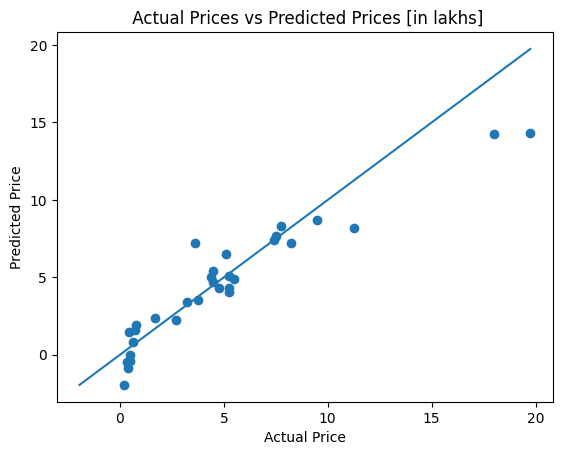

In [17]:
#visualising the difference in our predicted and actual values
import matplotlib.pyplot as plt

plt.scatter(Y_test, predicted_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices [in lakhs]")

p1 = max(max(predicted_data), max(Y_test))
p2 = min(min(predicted_data), min(Y_test))
plt.plot([p1, p2], [p1, p2])
plt.show()

In [18]:
#IMPLEMENTING DECISION TREE REGRESSOR MODEL

from sklearn.tree import DecisionTreeRegressor

In [19]:
dtr = DecisionTreeRegressor()

In [20]:
dtr.fit(X_train, Y_train)

DecisionTreeRegressor()

In [21]:
predicted_value = dtr.predict(X_test)
print(predicted_value)

[ 7.2   0.4   4.4   7.75 14.25  5.3   3.1   0.4   3.5   4.5   3.    0.9
  4.85  6.7   7.75 14.25  6.4   4.    0.45  1.65  2.65  5.5   4.5   9.15
  0.2   0.75  0.2   0.6   0.45  3.51  2.25]


In [22]:
#measuiring the error score of our trained model by R squared error
error_score = metrics.r2_score(Y_test, predicted_value)
print("R squared error is: ", error_score)

R squared error is:  0.9089500005441529


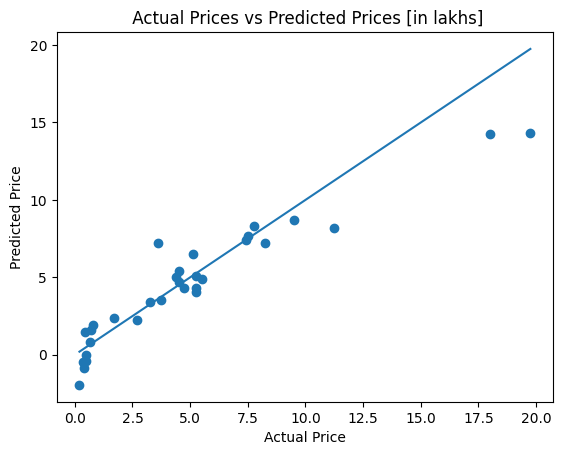

In [23]:
#visualising the difference in our predicted and actual values
import matplotlib.pyplot as plt

plt.scatter(Y_test, predicted_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices [in lakhs]")

p1 = max(max(predicted_value), max(Y_test))
p2 = min(min(predicted_value), min(Y_test))
plt.plot([p1, p2], [p1, p2])
plt.show()